Shapes: (3120, 1) (3120, 4) (3120, 14063)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ wind_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_input       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 5)         │          0 │ wind_input[0][0], │
│ (Concatenate)       │                   │            │ feature_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        384 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      4,160 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pressure_output     │ (None, 1)         │         65 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3753
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2957
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2895
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2841
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2947
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2994
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2868
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2837
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2949
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2992
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2895
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2853
Epoch 13/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2824
Epoch 14/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2881
Epoch 15/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2928
Epoc

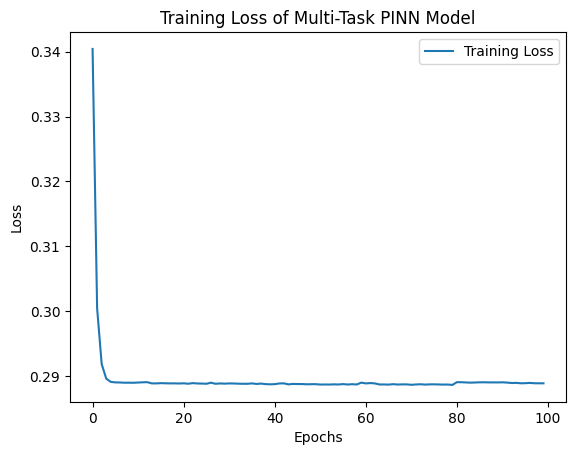

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Mean Pressure Coefficient at 15°: -24.5843
Predicted Mean Pressure Coefficient at 37°: -24.5839
Predicted Mean Pressure Coefficient at 60°: -24.5833
Predicted Mean Pressure Coefficient at 75°: -24.5830
Predicted Mean Pressure Coefficient at 95°: -24.5827


In [1]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import matplotlib.pyplot as plt
import os

# Enable GPU if available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Function to load MAT files and extract relevant data
def load_mat_files(directory):
    data = []
    for file in os.listdir(directory):
        if file.endswith(".mat"):
            mat_data = sio.loadmat(os.path.join(directory, file))
            if all(key in mat_data for key in ['Wind_pressure_coefficients', 'Roof_pitch', 'Building_depth', 'Building_breadth', 'Building_height', 'Wind_azimuth']):
                wind_pressure = mat_data['Wind_pressure_coefficients']
                roof_pitch = mat_data['Roof_pitch'].flatten()
                building_depth = mat_data['Building_depth'].flatten()
                building_breadth = mat_data['Building_breadth'].flatten()
                building_height = mat_data['Building_height'].flatten()
                wind_azimuth = mat_data['Wind_azimuth'].flatten()

                num_samples = wind_pressure.shape[1]
                wind_azimuth_repeated = np.tile(wind_azimuth[0], num_samples) if len(wind_azimuth) < num_samples else wind_azimuth

                for i in range(num_samples):
                    data.append((
                        wind_azimuth_repeated[i],
                        np.array([roof_pitch[0], building_depth[0], building_breadth[0], building_height[0]]),
                        wind_pressure[:, i]
                    ))

    if not data:
        print("No valid data found. Check directory structure and .mat file contents.")
    return data

# Specify folder path
data_dir = "C:/Users/rrsuj/Downloads/capstone/data"  # Change this to match your data location
data = load_mat_files(data_dir)

# Debug: Check if data is empty
if not data:
    raise ValueError("No data was loaded. Ensure the folder path is correct and .mat files contain the required keys.")

# Prepare dataset
X_wind, X_features, Y_train = zip(*data)
X_wind = np.array(X_wind).reshape(-1, 1)  # Wind azimuth
X_features = np.array(X_features)  # Combined feature vector
Y_train = np.array(Y_train)  # Pressure coefficient

print("Shapes:", X_wind.shape, X_features.shape, Y_train.shape)

# Define PINN with multi-task learning
def build_pinn():
    wind_input = Input(shape=(1,), name="wind_input")
    feature_input = Input(shape=(4,), name="feature_input")

    x = Concatenate()([wind_input, feature_input])
    x = Dense(64, activation="tanh")(x)
    x = Dense(64, activation="tanh")(x)
    x = Dense(64, activation="tanh")(x)
    output = Dense(1, activation="linear", name="pressure_output")(x)

    model = Model(inputs=[wind_input, feature_input], outputs=output)
    return model

# Physics-informed loss
def physics_loss(y_true, y_pred):
    rho = 1.225  # Air density (kg/m³)
    V_ref = 10  # Reference wind speed (m/s)
    Cp_physics = 2 * (y_pred / (rho * V_ref**2))
    return tf.reduce_mean(tf.square(y_true - Cp_physics))

# Compile model
pinn = build_pinn()
pinn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=physics_loss)
pinn.summary()

# Train model
history = pinn.fit([X_wind, X_features], Y_train, epochs=100, batch_size=32, verbose=1)

# Plot Training Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss of Multi-Task PINN Model")
plt.show()

# Predict for test angles
test_angles = np.array([[15], [37], [60], [75], [95]])
test_features = np.zeros((len(test_angles), 4))  # Dummy feature data
predicted_Cp = pinn.predict([test_angles, test_features])

# Display Predictions
for i, angle in enumerate(test_angles):
    print(f"Predicted Mean Pressure Coefficient at {angle[0]}°: {predicted_Cp[i][0]:.4f}")
